/tmp/ipython-input-256383121.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('PH-E', group_keys=False, observed=False).apply(


Simple Random Sample
               Q-E  ZN-E  PH-E  DBO-E  DQO-E    SS-E  SSV-E  SED-E  COND-E  \
D-15/3/91  31789.0  2.10   7.9  215.0  549.0   234.0   71.8    5.5    2370   
D-22/5/91  38792.0  1.89   7.7  250.0  431.0   196.0   64.3    5.5    1219   
D-8/3/90   41115.0  6.00   7.8    NaN  552.0   262.0   64.1    5.0    1603   
D-8/10/90  46240.0  2.70   7.9  122.0  287.0   168.0   50.0    2.0    1906   
D-5/6/90   39421.0  1.00   7.9  189.0  457.0  1004.0   25.5   24.0    1218   

           PH-P  ...  COND-S  RD-DBO-P  RD-SS-P  RD-SED-P  RD-DBO-S  RD-DQO-S  \
D-15/3/91   7.9  ...  2300.0      37.8     58.8      80.0      91.2      76.4   
D-22/5/91   7.9  ...  1197.0      66.7     63.9      96.7      88.7      71.0   
D-8/3/90    7.8  ...  1703.0       NaN     61.9      93.8      89.1      79.8   
D-8/10/90   7.8  ...  1425.0      36.9     51.1      92.5      87.9      78.3   
D-5/6/90    7.8  ...  1172.0      33.3     89.9      99.1      87.8      75.5   

           RD-DBO-G  RD

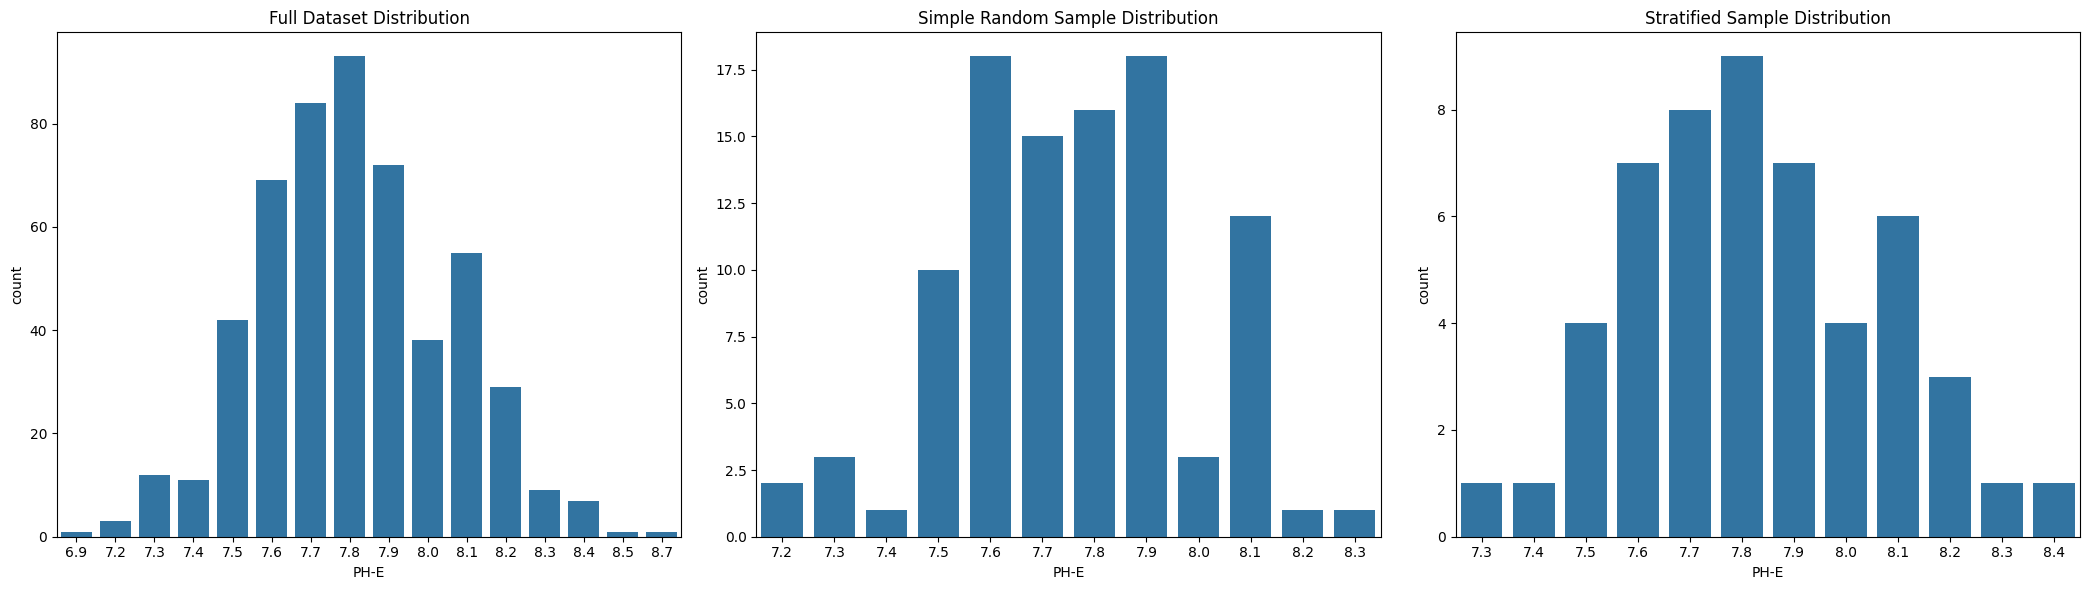

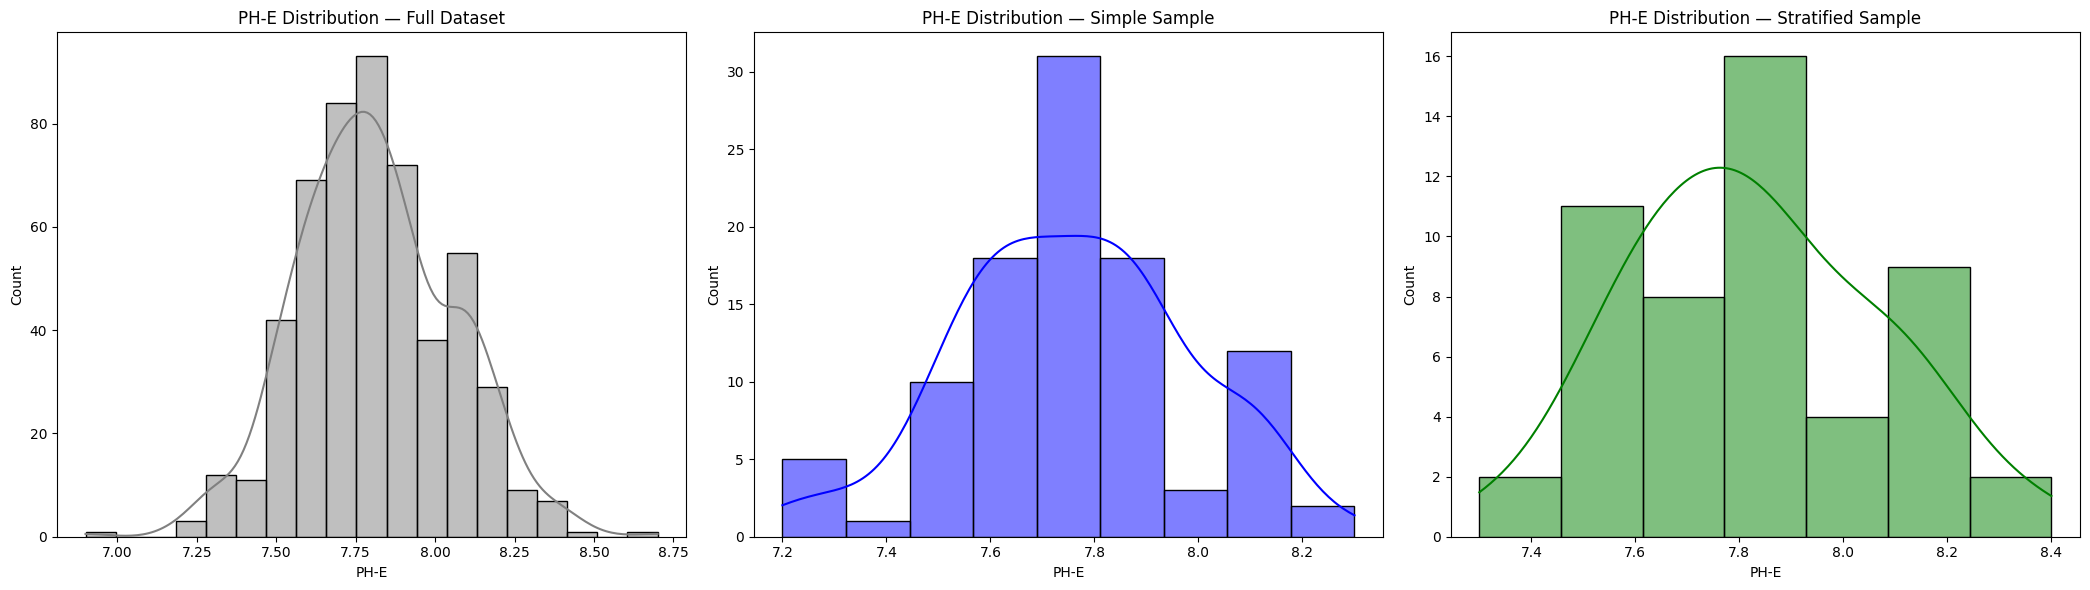

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load full dataset
columns = [
    "Q-E", "ZN-E", "PH-E", "DBO-E", "DQO-E", "SS-E", "SSV-E", "SED-E", "COND-E",
    "PH-P", "DBO-P", "SS-P", "SSV-P", "SED-P", "COND-P",
    "PH-D", "DBO-D", "DQO-D", "SS-D", "SSV-D", "SED-D", "COND-D",
    "PH-S", "DBO-S", "DQO-S", "SS-S", "SSV-S", "SED-S", "COND-S",
    "RD-DBO-P", "RD-SS-P", "RD-SED-P", "RD-DBO-S", "RD-DQO-S",
    "RD-DBO-G", "RD-DQO-G", "RD-SS-G", "RD-SED-G"
]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data"
df = pd.read_csv(url, names=columns, na_values=["?"])

# Simple Random Sampling
simple_sample = df.sample(n=100, random_state=42)

# Stratified Sampling based on the 'PH-E' column
stratified_sample = df.groupby('PH-E', group_keys=False, observed=False).apply(
    lambda x: x.sample(int(np.rint(0.1 * len(x))))
)


# Display sample heads
print("Simple Random Sample")
print(simple_sample.head())

print("\n Stratified Sample")
print(stratified_sample.head())

# Proportion Comparison of PH-E
print("\n Proportion of PH-E:")
print("Full Dataset:")
print(df["PH-E"].value_counts(normalize=True))
print("\nSimple Sample:")
print(simple_sample["PH-E"].value_counts(normalize=True))
print("\nStratified Sample:")
print(stratified_sample["PH-E"].value_counts(normalize=True))

# Visual Comparison: PH-E
plt.figure(figsize=(21, 6))

plt.subplot(1, 3, 1)
sns.countplot(x="PH-E", data=df)
plt.title("Full Dataset Distribution")

plt.subplot(1, 3, 2)
sns.countplot(x="PH-E", data=simple_sample)
plt.title("Simple Random Sample Distribution")

plt.subplot(1, 3, 3)
sns.countplot(x="PH-E", data=stratified_sample)
plt.title("Stratified Sample Distribution")

plt.tight_layout()
plt.show()

# Visual Comparison: PH-E Histograms
plt.figure(figsize=(21, 6))

plt.subplot(1, 3, 1)
sns.histplot(df["PH-E"], kde=True, color="gray")
plt.title("PH-E Distribution — Full Dataset")

plt.subplot(1, 3, 2)
sns.histplot(simple_sample["PH-E"], kde=True, color="blue")
plt.title("PH-E Distribution — Simple Sample")

plt.subplot(1, 3, 3)
sns.histplot(stratified_sample["PH-E"], kde=True, color="green")
plt.title("PH-E Distribution — Stratified Sample")

plt.tight_layout()
plt.show()

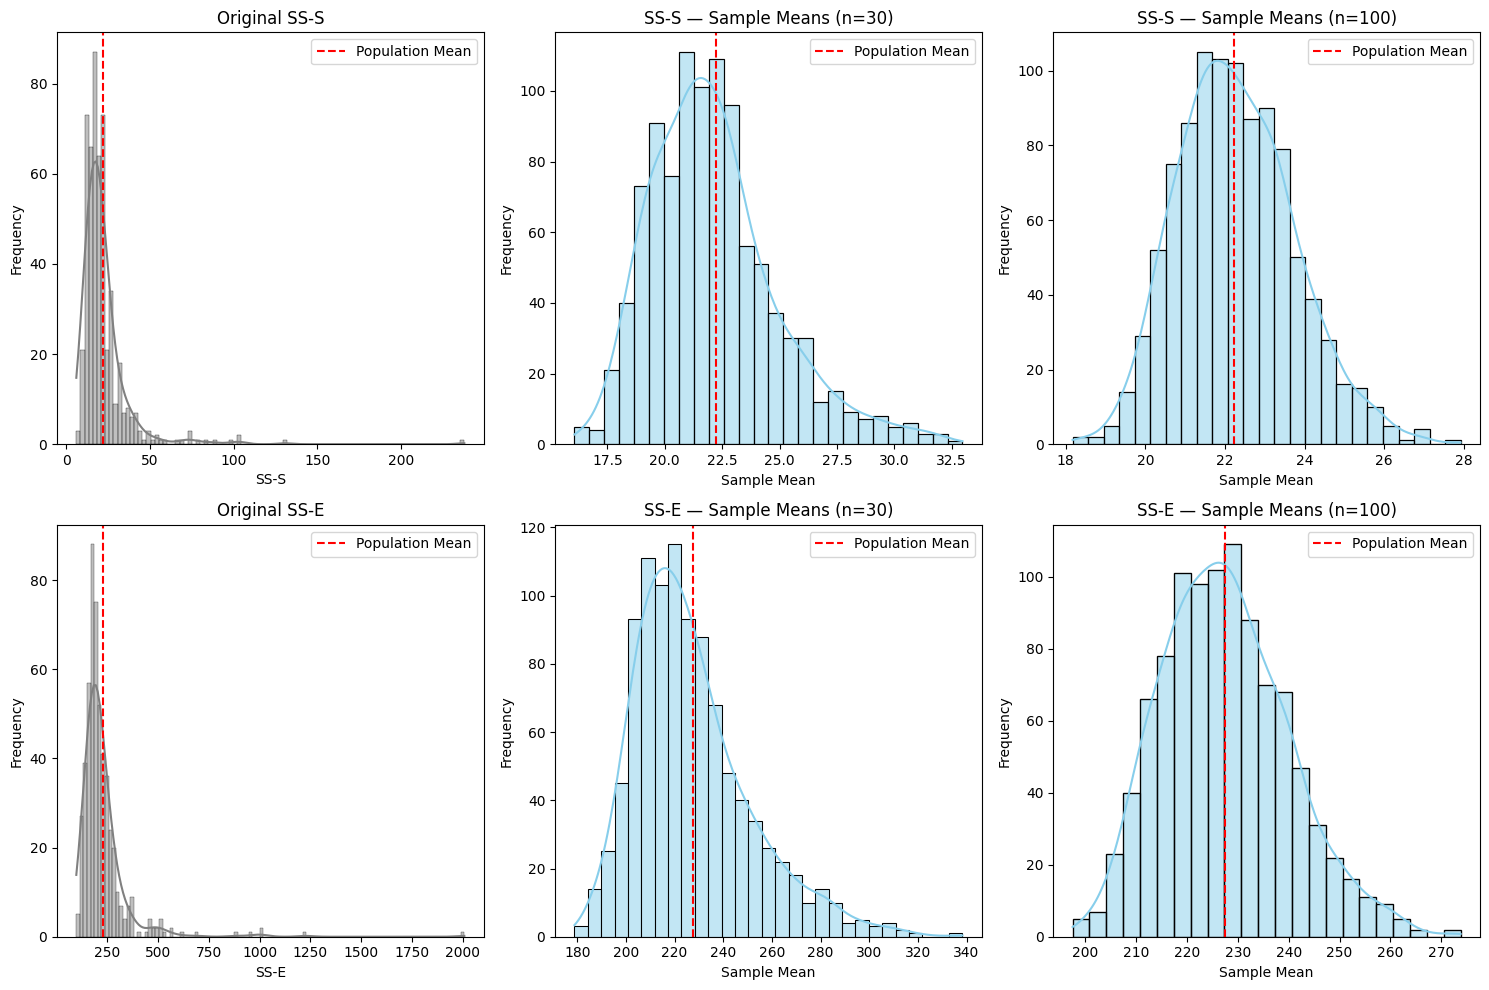


Summary Statistics:
Variable              Dataset       Mean    Std Dev
    SS-S            Full Data  22.235632  16.337023
    SS-S  Sample Means (n=30)  22.094233   2.757107
    SS-S Sample Means (n=100)  22.277290   1.463306
    SS-E            Full Data 227.444867 135.940589
    SS-E  Sample Means (n=30) 227.026533  23.832881
    SS-E Sample Means (n=100) 227.503560  12.366675


In [38]:
# Function to generate sample means
def get_sample_means(series, sample_size, repeats=1000):
    """Return a list of sample means from repeated random sampling."""
    return [series.sample(n=sample_size).mean() for _ in range(repeats)]

# Parameters
variables     = ["SS-S", "SS-E"]   # Columns to analyse
sample_sizes  = [30, 100]         # Sample sizes to test
n_repeats     = 1000              # Number of repeated samples

summary_stats = []                # Store summary statistics
sample_means  = {}                 # Store sampling distributions

# Main loop
for var in variables:
    data = df[var].dropna()
    sample_means[var] = {}

    # Full dataset stats
    summary_stats.append({
        "Variable": var,
        "Dataset": "Full Data",
        "Mean": data.mean(),
        "Std Dev": data.std()
    })

    # Sampling distributions
    for n in sample_sizes:
        means = get_sample_means(data, n, n_repeats)
        sample_means[var][n] = means

        summary_stats.append({
            "Variable": var,
            "Dataset": f"Sample Means (n={n})",
            "Mean": np.mean(means),
            "Std Dev": np.std(means)
        })

# Plotting
fig, axes = plt.subplots(
    nrows=len(variables),
    ncols=len(sample_sizes) + 1,
    figsize=(5 * (len(sample_sizes) + 1), 5 * len(variables))
)

for row, var in enumerate(variables):
    data = df[var].dropna()

    # Original data distribution
    sns.histplot(data, kde=True, color="gray", ax=axes[row, 0])
    axes[row, 0].axvline(data.mean(), color='red', linestyle='--', label='Population Mean')
    axes[row, 0].set_title(f"Original {var}")
    axes[row, 0].set_xlabel(var)
    axes[row, 0].set_ylabel("Frequency")
    axes[row, 0].legend()

    # Sampling distributions
    for col, n in enumerate(sample_sizes, start=1):
        sns.histplot(sample_means[var][n], kde=True, color="skyblue", ax=axes[row, col])
        axes[row, col].axvline(data.mean(), color='red', linestyle='--', label='Population Mean')
        axes[row, col].set_title(f"{var} — Sample Means (n={n})")
        axes[row, col].set_xlabel("Sample Mean")
        axes[row, col].set_ylabel("Frequency")
        axes[row, col].legend()

plt.tight_layout()
plt.show()

# Summary table
summary_df = pd.DataFrame(summary_stats)
print("\nSummary Statistics:")
print(summary_df.to_string(index=False))